In [1]:
import numpy as np
import scipy.io.wavfile
import scipy.fftpack
import scipy.signal
import scipy.interpolate
from matplotlib import pyplot as plt
import librosa as rosa
from librosa import effects, display
import tqdm
plt.style.use("solarized-light")
#plt.xkcd()
lim_xlabel = 1280

/tmp/ipykernel_27399/3100166907.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = scipy.io.wavfile.read("./ichika-a-1.wav") # 310~310.5, f[bE]=311.127


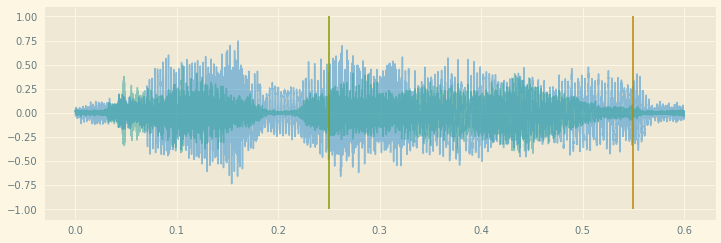

In [2]:
fs, x = scipy.io.wavfile.read("./ick-la-1.wav") # 310~310.5, f[bE]=311.127
x_abs_max = np.abs(x).max()
x_harm, x_perc = rosa.effects.hpss(x / np.abs(x).max())
t_list = np.arange(len(x)) / fs
t_starter, t_ender = 5512 * 2, -1103 * 2
with plt.rc_context({"figure.figsize": [ 12, 3.9 ]}):
    plt.plot(t_list, x_harm, alpha=.5)
    plt.plot(t_list, x_perc, alpha=.5)
    plt.plot(t_starter * np.array([ 1, 1 ]) / fs, [ -1, 1 ])
    plt.plot((len(x) + t_ender) * np.array([ 1, 1 ]) / fs, [ -1, 1 ])
    plt.show()
x_clip = x[ t_starter : t_ender ] / x_abs_max
x_clip = x / x_abs_max

In [3]:
if False:
    arr1 = [ x[ k :: 4 ] for k in range(4) ]
    arr1_harm = [ x_harm[ k :: 4 ] for k in range(4) ]
    arr1_perc = [ x_perc[ k :: 4 ] for k in range(4) ]
    arr2 = [ x[ 6615 * k : 6615 * (k + 1) ] for k in range(4) ]
    arr2_harm = [ x_harm[ 6615 * k : 6615 * (k + 1) ] for k in range(4) ]
    arr2_perc = [ x_perc[ 6615 * k : 6615 * (k + 1) ] for k in range(4) ]
    with plt.rc_context({"figure.figsize": [ 18, 5.6 ]}):
        for k in range(4):
            plt.subplot(421 + k * 2)
            #plt.plot(arr1[k])
            plt.plot(arr1_harm[k], alpha=.5)
            plt.plot(arr1_perc[k], alpha=.5)
        for k in range(4):
            plt.subplot(422 + k * 2)
            #plt.plot(arr2[k])
            plt.plot(arr2_harm[k], alpha=.5)
            plt.plot(arr2_perc[k], alpha=.5)
        plt.show()

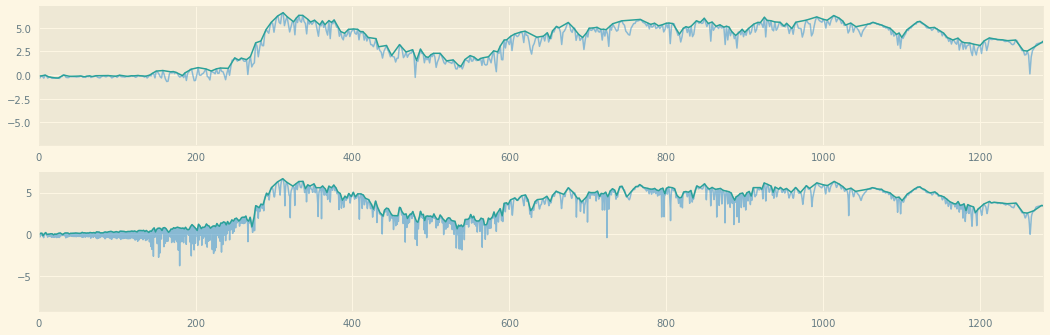

In [4]:
f_fft = scipy.fftpack.fftfreq(len(x_clip), 1 / fs)
f_fft_shift = scipy.fftpack.fftshift(f_fft)
x_clip_fft = scipy.fftpack.fft(x_clip)
x_clip_fft_shift = scipy.fftpack.fftshift(x_clip_fft)
x_clip_pad = np.concatenate([ x_clip, np.zeros(len(x_clip) * 39) ])
f_pad_fft = scipy.fftpack.fftfreq(len(x_clip_pad), 1 / fs)
f_pad_fft_shift = scipy.fftpack.fftshift(f_pad_fft)
x_clip_pad_fft = scipy.fftpack.fft(x_clip_pad)
x_clip_pad_fft_shift = scipy.fftpack.fftshift(x_clip_pad_fft)
x_clip_fft_shift_db = np.log(np.abs(x_clip_fft_shift))
x_clip_pad_fft_shift_db = np.log(np.abs(x_clip_pad_fft_shift))
peaks_x_clip_fft_shift_db = scipy.signal.find_peaks(x_clip_fft_shift_db)[0]
peaks_x_clip_pad_fft_shift_db = scipy.signal.find_peaks(x_clip_pad_fft_shift_db)[0]
with plt.rc_context({"figure.figsize": [ 18, 5.6 ]}):
    if False:
        plt.subplot(211)
        plt.plot(f_fft_shift, x_clip_fft_shift.real)
        plt.xlim(-lim_xlabel, lim_xlabel)
        plt.subplot(212)
        plt.plot(f_fft_shift, x_clip_fft_shift.imag)
        plt.xlim(-lim_xlabel, lim_xlabel)
        plt.show()
    else:
        plt.subplot(211)
        plt.plot(f_fft_shift, x_clip_fft_shift_db, alpha=.5)
        plt.plot(f_fft_shift[peaks_x_clip_fft_shift_db], x_clip_fft_shift_db[peaks_x_clip_fft_shift_db])
        plt.xlim(left=0, right=lim_xlabel)
        plt.subplot(212)
        plt.plot(f_pad_fft_shift, x_clip_pad_fft_shift_db, alpha=.5)
        plt.plot(f_pad_fft_shift[peaks_x_clip_pad_fft_shift_db], x_clip_pad_fft_shift_db[peaks_x_clip_pad_fft_shift_db])
        plt.xlim(left=0, right=lim_xlabel)
        plt.show()

In [5]:
if False:
    if True:
        f_new_fft = scipy.fftpack.fftfreq(int(len(x_clip) * 2), 1 / fs)
        f_new_fft_shift = scipy.fftpack.fftshift(f_new_fft)
        x_clip_new_fft_shift = np.zeros(f_new_fft_shift.shape, dtype=complex)
        x_clip_new_fft_shift[ len(f_new_fft_shift) // 2 - len(f_fft_shift) // 2 : len(f_new_fft_shift) // 2 - len(f_fft_shift) // 2 + len(x_clip_fft_shift) ] += x_clip_fft_shift
    else:
        f_new_fft = scipy.fftpack.fftfreq(len(x_clip) // 2, 1 / fs)
        f_new_fft_shift = scipy.fftpack.fftshift(f_new_fft)
        x_clip_new_fft_shift = np.zeros(f_new_fft_shift.shape, dtype=complex)
        x_clip_new_fft_shift += x_clip_fft_shift[ len(f_fft_shift) // 2 - len(f_new_fft_shift) // 2 : len(f_fft_shift) // 2 - len(f_new_fft_shift) // 2 + len(x_clip_new_fft_shift) ]
    #scipy.fftpack.fftshift(scipy.fftpack.fftfreq(len(x_clip) // 2, 1 / fs))[6615 // 2]
    with plt.rc_context({"figure.figsize": [ 18, 5.6 ]}):
        plt.subplot(211)
        plt.plot(f_fft_shift, x_clip_fft_shift.real, alpha=.5)
        plt.plot(f_new_fft_shift, x_clip_new_fft_shift.real, alpha=.5)
        plt.subplot(212)
        plt.plot(f_fft_shift, x_clip_fft_shift.imag, alpha=.5)
        plt.plot(f_new_fft_shift, x_clip_new_fft_shift.imag, alpha=.5)
        plt.show()
    x_clip_new_fft = scipy.fftpack.ifftshift(x_clip_new_fft_shift)
    x_clip_new = scipy.fftpack.ifft(x_clip_new_fft).real

[ 0 , 1 , idx_mid - 1 , idx_mid , idx_mid + 1 , (-1) ]: [  0   0 551 551 551   0]


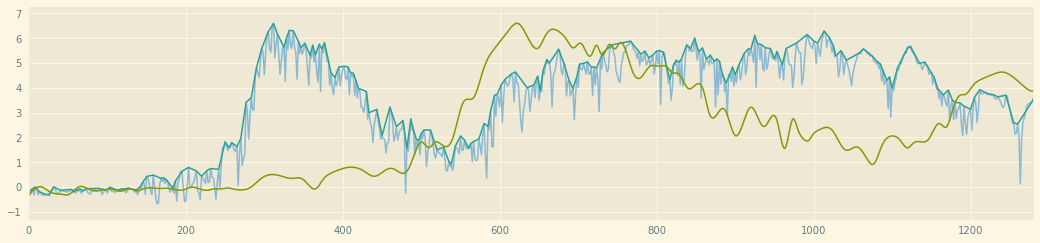

In [6]:
idx_mid = len(x_clip_fft) // 2
print(
    "[ 0 , 1 , idx_mid - 1 , idx_mid , idx_mid + 1 , (-1) ]:",
    f_pad_fft[ [ 0 , 1 , idx_mid - 1 , idx_mid , idx_mid + 1 , (-1) ] ].astype(int)
    )
f_fft_pos = f_fft[ : idx_mid ]
x_clip_fft_pos = x_clip_fft[ : idx_mid ]
x_clip_fft_pos_db = np.log(np.abs(x_clip_fft_pos))
peaks_x_clip_pad_fft_pos_db = np.concatenate([ [0] , scipy.signal.find_peaks(x_clip_fft_pos_db)[0] ])
interp_peaks_x_clip_pad_fft_pos_db = scipy.interpolate.interp1d(
    f_fft_pos[peaks_x_clip_pad_fft_pos_db],
    x_clip_fft_pos_db[peaks_x_clip_pad_fft_pos_db],
    kind="cubic"
    )
with plt.rc_context({"figure.figsize": [ 18 or 3.9, 3.9 ]}):
    plt.plot(f_fft_pos, x_clip_fft_pos_db, alpha=.5)
    plt.plot(f_fft_pos[peaks_x_clip_pad_fft_pos_db], x_clip_fft_pos_db[peaks_x_clip_pad_fft_pos_db])
    plt.plot(f_fft_pos, interp_peaks_x_clip_pad_fft_pos_db(f_fft_pos / 2))
    plt.xlim(0, lim_xlabel)
    plt.ylim(ymin=-1.28)
    if False:
        plt.savefig("./Denebola.jpeg")
    plt.show()

In [7]:
if True:
    response_x_clip_fft_pos = np.exp(interp_peaks_x_clip_pad_fft_pos_db(f_fft_pos * (2 ** (-12 / 12)))) / np.exp(x_clip_fft_pos_db)
    if False:
        with plt.rc_context({"figure.figsize": [ 18, 3.9 ]}):
            plt.plot(f_fft_pos, response_x_clip_fft_pos)
            #plt.xlim(0, lim_xlabel)
            plt.show()
    x_clip_new_fft_pos = x_clip_fft_pos * response_x_clip_fft_pos
    if False:
        with plt.rc_context({"figure.figsize": [ 18, 3.9 ]}):
            plt.plot(f_fft_pos, np.log(np.abs(x_clip_new_fft_pos)))
            plt.xlim(0, lim_xlabel)
            plt.show()
        with plt.rc_context({"figure.figsize": [ 18, 3.9 ]}):
            plt.subplot(211)
            plt.plot(f_fft_pos, x_clip_new_fft_pos.real)
            plt.xlim(0, lim_xlabel)
            plt.subplot(212)
            plt.plot(f_fft_pos, x_clip_new_fft_pos.imag)
            plt.xlim(0, lim_xlabel)
            plt.show()
    x_clip_new_fft = np.concatenate([ x_clip_new_fft_pos , [0] , x_clip_new_fft_pos[ 1 : ][ :: (-1) ].conjugate() ])
    x_clip_new = scipy.fftpack.ifft(x_clip_new_fft).real

In [8]:
if True:
    scipy.io.wavfile.write("./outest.wav", fs, x_clip_new / np.abs(x_clip_new).max())